## Tutorial of scLT-kit

### Load dataset and parameters

#### [Larry-Invitro-differentiation](https://cloud.tsinghua.edu.cn/f/1b94b3229f4a4c52985e/?dl=1)

In [1]:
from scLTkit.scLTStatistics import LTStatistics
from scLTkit.scLTAnalyses import LTAnalyses

In [2]:
import os
import scanpy as sc
dataPath = "D:/Lineage-data/Science2020-Larry/In vitro differentiation time course/"
savePath = "D:/Lineage-data/Science2020-Larry/scLTkit-res/"
if not os.path.exists(savePath):
    os.makedirs(savePath)
datasetName = "Science20-Larry"
sampleName = "In vitro diff"
lineage_identity = "Clone"
data_4 = sc.read(dataPath + 'D4_larry_scobj_down50.h5ad')
data_6 = sc.read(dataPath + 'D6_larry_scobj_down50.h5ad')

### scLTStatistics

------0. Preparing Basic information------
------End of prepareBasicInfo------
------1. Start of getBarcodingFractions------
------Pre time point------
Number of cells in the former time point:  24249
Number of cells with lineage barcode:  7495
Number of cells with flow-out information:  5385
Barcoding fraction of pre-timepoint: 0.3091
Flow-out density of pre-timepoint: 0.2221
------Pos time point------
Number of cells in the latter time point:  27070
Number of cells with lineage barcode:  14844
Number of cells with flow-in information:  11215
Barcoding fraction of pos-timepoint: 0.5484
Flow-in density of pos-timepoint: 0.4143


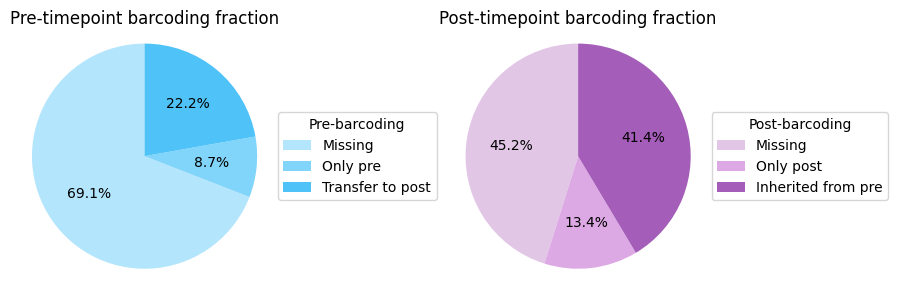

------End of getBarcodingFractions------
------2. Start of getClonalSizes------


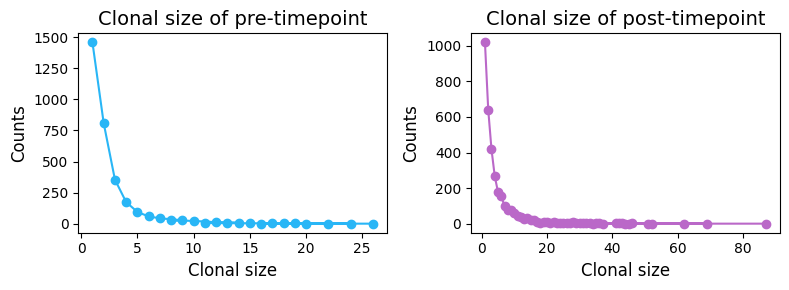

------End of getClonalSizes------


In [3]:
lt_statistics_toolbox = LTStatistics(data_pre=data_4,
                                     data_pos=data_6,
                                     datasetName=datasetName,
                                     sampleName=sampleName,
                                     dataPath=dataPath,
                                     savePath=savePath,
                                     lineage_identity=lineage_identity)
lt_statistics_toolbox.runLTStatistics()

### scLTAnalyses

------0. Preparing Basic information------
------End of prepareBasicInfo------
------1. Start of runClonalHeterogeneity------
------Mode: cross time-point------


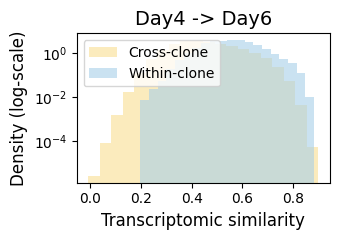

------End of Mode: cross time-point------
------Mode: pre time-point------


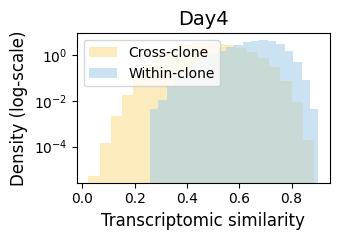

------End of Mode: pre time-point------
------Mode: pos time-point------


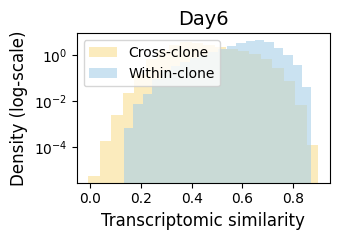

------End of Mode: pos time-point------
------End of runClonalHeterogeneity------
------2. Start of runCellDynamics------
## Identify cell clusters and cell states


E:\Lineage\Code\scLTkit\scLTkit\utils.py:25: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(scd.data_pre, key_added='cluster', resolution=scd.cls_resolutions[0])


| - N_cells: [24249, 27070]
| - N_clusters: [5 5]
| - Saving figure: D:/Lineage-data/Science2020-Larry/scLTkit-res/Science20-Larry_In vitro diff-Day4_Day6_Cell-PairUMAP.png


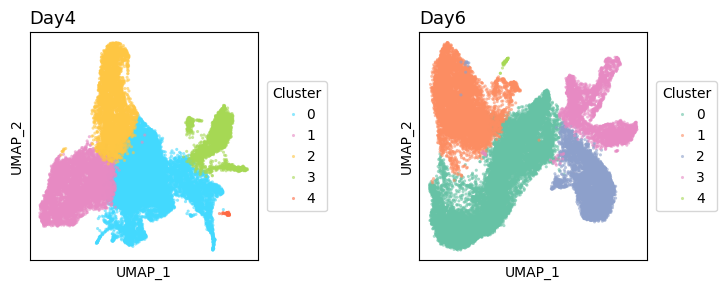

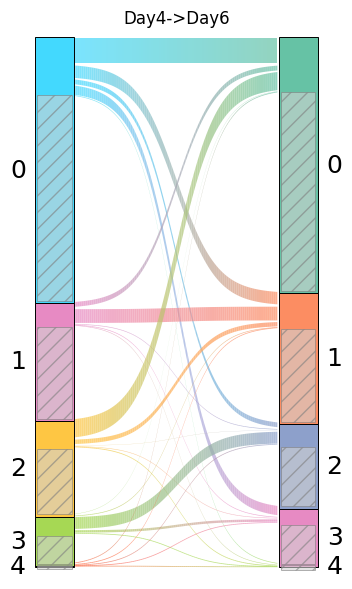

------End of runCellDynamics------
------3. Start of runCellFateDiversity------


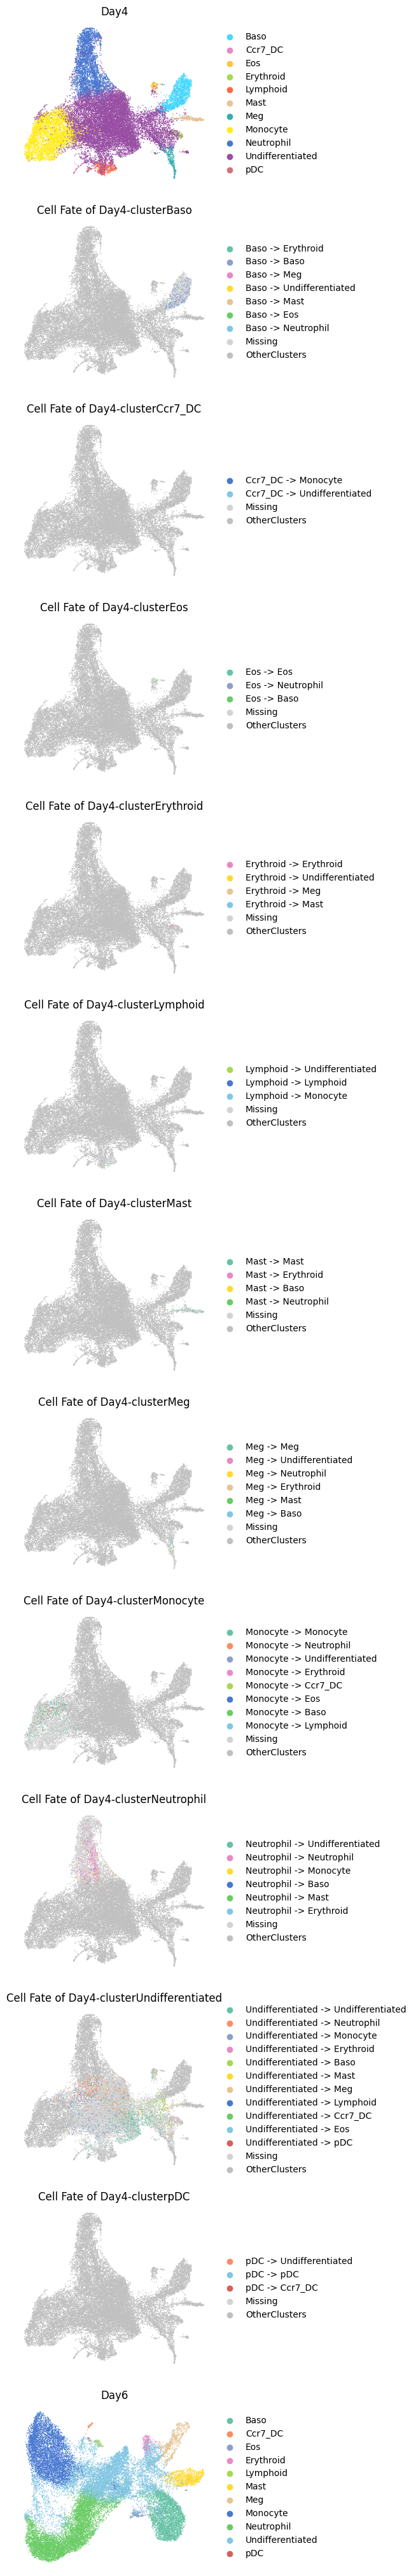

E:\Lineage\Code\scLTkit\scLTkit\utils.py:510: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  same_label_count = sum(1 for j in neighbors if labels[j] == labels[i])
E:\Lineage\Code\scLTkit\scLTkit\utils.py:513: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_counts = Counter(labels[j] for j in neighbors)


Neighboring cell fate label consistency (NFC): 0.5900
Neighboring cell fate similarity (NFS): 0.6354
Cell fate randomness (CFR): 0.3273
Neighboring cell fate label randomness (NFR) : 0.5242
------End of runCellFateDiversity------
------4. Start of runSubClusterDiff------
Mode of runSubClusterDiff: 1 v.s. Rest
        Gene           Cluster                   Fate    scores  \
0      H2-Aa          Monocyte   Monocyte->Neutrophil  5.625127   
1     H2-Eb1          Monocyte   Monocyte->Neutrophil  5.555724   
2       Cd74          Monocyte   Monocyte->Neutrophil  5.494997   
3       Fth1          Monocyte   Monocyte->Neutrophil  4.615311   
4     H2-Ab1          Monocyte   Monocyte->Neutrophil  4.457419   
..       ...               ...                    ...       ...   
109     Rtp4  Undifferentiated  Undifferentiated->Eos  3.247917   
110    Dock2  Undifferentiated  Undifferentiated->Eos  3.239178   
111  Dcun1d1  Undifferentiated  Undifferentiated->Eos  3.234887   
112   Dnajc8  Undif

In [4]:
lt_analyses_toolbox = LTAnalyses(data_pre=data_4,
                                 data_pos=data_6,
                                 datasetName=datasetName,
                                 sampleName=sampleName,
                                 dataPath=dataPath,
                                 savePath=savePath,
                                 lineage_identity=lineage_identity,
                                 pre_name="Day4",
                                 pos_name="Day6",
                                 sel_cluster_name="Cell type annotation", # "cluster" as default, "Cell type annotation" for Larry dataset
                                 cls_resolutions=[0.07, 0.07])
lt_analyses_toolbox.runLTAnalyses()

### Select clusters and fates for diff-analysis

In [5]:
sel_cls = 'Undifferentiated'
sel_fates = [['Undifferentiated -> Undifferentiated', 'Undifferentiated -> Neutrophil'],
             ['Undifferentiated -> Undifferentiated', 'Undifferentiated -> Monocyte']]
lt_analyses_toolbox.runSubClusterDiff(sel_cls=sel_cls,
                                      sel_fates=sel_fates)

Mode of runSubClusterDiff: 1 v.s. 1
['Undifferentiated -> Undifferentiated', 'Undifferentiated -> Neutrophil']
       Gene           Cluster                                  Fate  \
0     Elane  Undifferentiated        Undifferentiated -> Neutrophil   
1     Prtn3  Undifferentiated        Undifferentiated -> Neutrophil   
2       Mpo  Undifferentiated        Undifferentiated -> Neutrophil   
3     Ap3s1  Undifferentiated        Undifferentiated -> Neutrophil   
4     Gstm1  Undifferentiated        Undifferentiated -> Neutrophil   
..      ...               ...                                   ...   
109    Wbp5  Undifferentiated  Undifferentiated -> Undifferentiated   
110  Bcl11a  Undifferentiated  Undifferentiated -> Undifferentiated   
111  Angpt1  Undifferentiated  Undifferentiated -> Undifferentiated   
112   Isg15  Undifferentiated  Undifferentiated -> Undifferentiated   
113  Rpl18a  Undifferentiated  Undifferentiated -> Undifferentiated   

        scores  logfoldchanges      